In [1]:
# for package auto reload
%load_ext autoreload
%autoreload 2

# for better rendering of plots in jupyter notebook
%matplotlib inline 

In [1]:
# base modules
import os
import sys
import copy 

# Import needed packages
#To manipulate data
import numpy as np
import pandas as pd

#To display graphs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import graphviz



#To run models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer


# custom module
sys.path.insert(0, os.path.join('/Users/bcoquard/Python lesson/Notebooks/advance ML-Course-2022-T1-main', 'src'))

# custom module
from emlyon.utils import *



## Read files and have a glimpse of the data¶

In [3]:
#load the data sets
train=pd.read_csv('/Users/bcoquard/Python lesson/Notebooks/Kaggle Competition/titanic/train.csv')
test=pd.read_csv('/Users/bcoquard/Python lesson/Notebooks/Kaggle Competition/titanic/test.csv')


In [4]:
combine = [train, test]
print('Number of rows (Train): ' + str(len(train)))
print('Number of DUPLICATE rows (Train): ' + str(len(train) - len(train.drop_duplicates())))
print('_' * 40)
print('Number of rows (Test): ' + str(len(test)))
print('Number of DUPLICATE rows (Test): ' + str(len(test) - len(test.drop_duplicates())))
train[:5]

Number of rows (Train): 891
Number of DUPLICATE rows (Train): 0
________________________________________
Number of rows (Test): 418
Number of DUPLICATE rows (Test): 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
# Check number of unique values for every column
for col in train.columns:
    print(col + ': ' + str(train[col].nunique()) + ' unique values')
print('_'*80)
print(train.info())
print('_'*80)
print(train.describe())
print('_'*80)
print(train.describe(include=['O']))
print('_'*80)
# Check for missing values in every column
print('Number of missing value(s) in every column (Train):')
print(train.isnull().sum())
print('Number of missing value(s) in every column (Test):')
print(test.isnull().sum())

PassengerId: 891 unique values
Survived: 2 unique values
Pclass: 3 unique values
Name: 891 unique values
Sex: 2 unique values
Age: 88 unique values
SibSp: 7 unique values
Parch: 7 unique values
Ticket: 681 unique values
Fare: 248 unique values
Cabin: 147 unique values
Embarked: 3 unique values
________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin     

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


>> Looking at the datas for the Train Dataset ( Df_raw)
- So we could see that  the column " Cabin" is at 77% composed of NaN values, however this might be an important feature to help predict if the passager has survided. As a matter of fact, Cabins location on the boat depended on the level of cabin and this might have played a role in the change to survive. As we have the price of all the tickets we might be able to predict the cabin level. So we will keep the column and categorize it.

- Almost 20% of Age column is Nan which is another critical feature that might have played a role in the chance to survive. Let see if we have other way to predict the age range based on other features or on class age variance. As age column only have 20% Nan we might be looking at replacing Nan values by mean. It is an option we will use at first.

- Columns "Name" and "sex" are objects. We might be willing to convert "sex" into a categorical column.
- Name is not really interesting has it is hard to convert , but inthe name , we have the notion of Mister, Miss or Misses which can be easily categorized and might play another role to increase our precision while predicting. Let's keep it in mind. For the first try we will probably  drop the column.

- For the column "Embarked" composed of only 2 Nan we will replace the Nan Values with "NA".

Let's have a look at the rows for which "Age" is a Nan Value.


In [9]:
#Display all the rows with Nan values for the column 'Age'
train[train['Age'].isnull().T]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [10]:
#Display all the rows without Nan values for the column 'Cabin'
train[train['Cabin'].notnull().T]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [11]:
train['Cabin'].sort_values(ascending=True)

583    A10
475    A14
556    A16
284    A19
599    A20
      ... 
884    NaN
885    NaN
886    NaN
888    NaN
890    NaN
Name: Cabin, Length: 891, dtype: object

> Ordering the values of the column Cabin, we can note :
- Cabin numbers all start with a letter that goers from A to G included and there is a single row with a T.
- Some values are composed of multiple room numbers which belongs to the wsame family siblings.Since the rooms are located closed to each others it doesn't have a huge impact if we only keep one location and not all.

In [12]:
#Display all the rows with Nan values for the column 'Age'
train[train['Embarked'].isnull().T]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


> Interesting to note that the 2 women for which we don't have the harbor where they embarked ,  where staying in the same room , with the same ticket number and have both survived.

## Visualization of the features corrolations 

/var/folders/zl/x71m3zt57t93w7cymq9rswrm0000gn/T/ipykernel_59959/3912785705.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap="crest", annot=True, ax=ax)


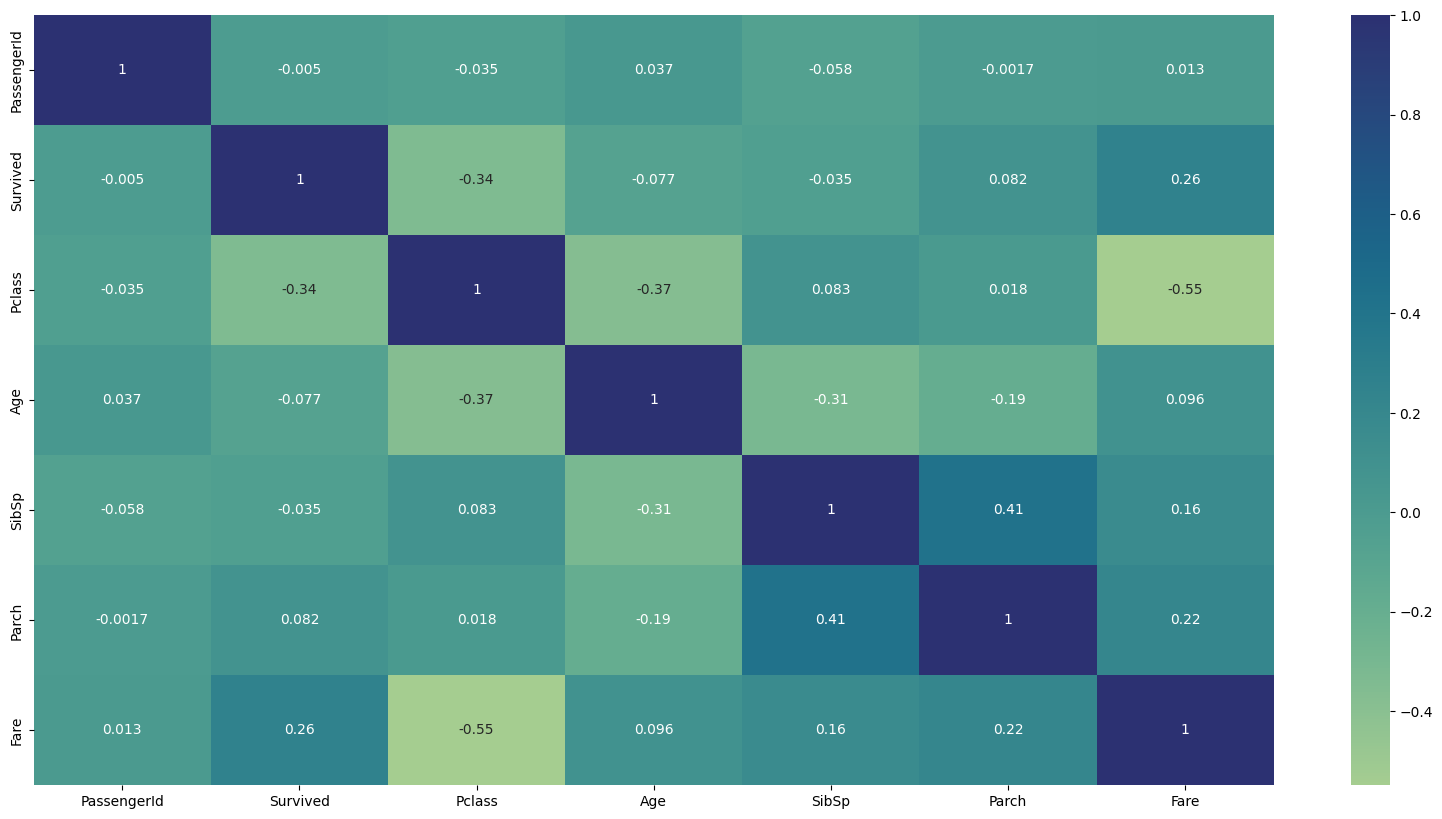

In [13]:
#check the correlation between the numerical variables
fig, ax=plt.subplots(figsize = (20,10))
sns.heatmap(train.corr(), cmap="crest", annot=True, ax=ax)
plt.show()

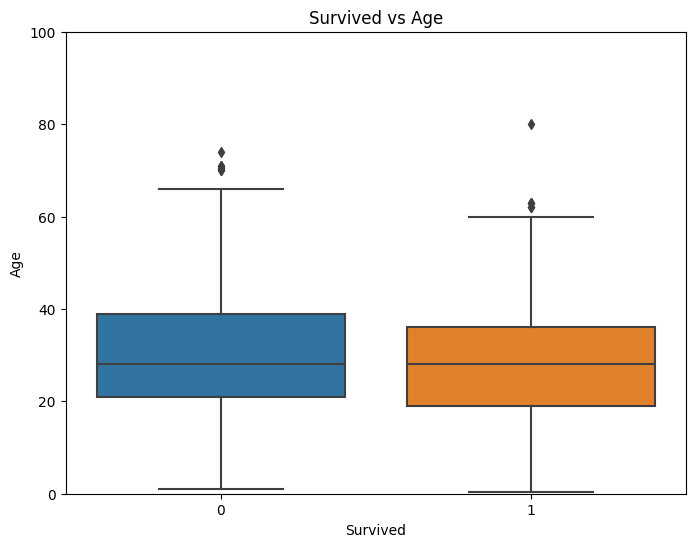

In [14]:

# age (x=0 means dead, x=1 means survived)
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='Survived',y='Age', data=train)
ax.set_ylim(0,100)
plt.title("Survived vs Age")

plt.show()



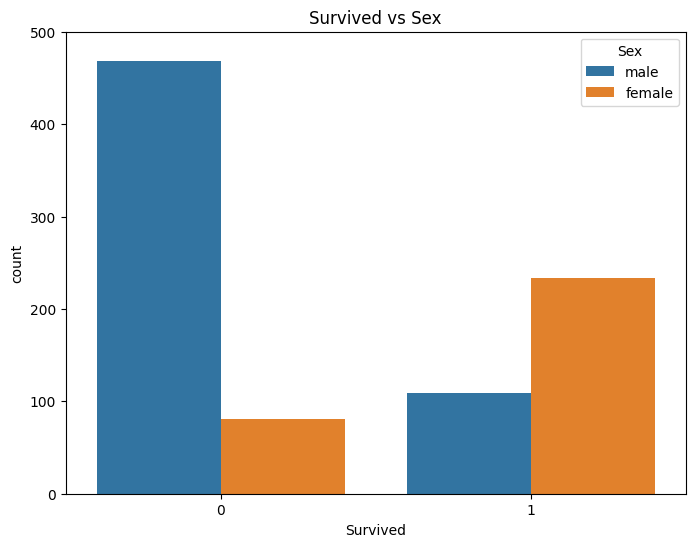

In [15]:
# Sex
fig, ax=plt.subplots(1,figsize=(8,6))
sns.countplot(x='Survived' ,hue='Sex', data=train)
ax.set_ylim(0,500)
plt.title("Survived vs Sex")
plt.show()



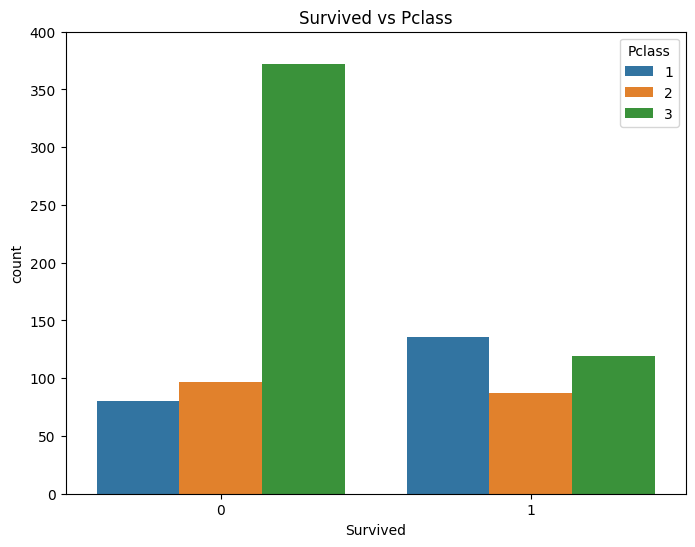

In [16]:
# Pclass
fig, ax=plt.subplots(1,figsize=(8,6))
sns.countplot(x='Survived' ,hue='Pclass', data=train)
ax.set_ylim(0,400)
plt.title("Survived vs Pclass")
plt.show()



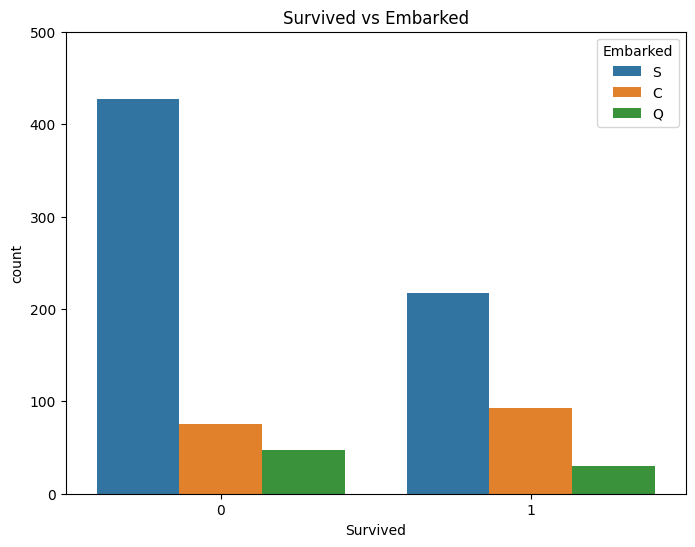

In [17]:
# Embarked
fig, ax=plt.subplots(1,figsize=(8,6))
sns.countplot(x='Survived' ,hue='Embarked', data=train)
ax.set_ylim(0,500)
plt.title("Survived vs Embarked")
plt.show()

### What information are we getting from the graphs

For Age, there are some outliers. However, since it is still within a reasonable age range (around 62 - 80 years old) we'll keep the data
Females were more likely to survived than Male ->almost 2/3 of the female survived when almost 80% of male died.
Pclass = 1, i.e upper class,  were more likely to survived with aratio. of 2/3 , when class3 passengers had more than 70% to die.
Passengers embarked from S were less likely to survived (Possibility of a correlation between Pclass and Embarked)
Additional insights:
Since class of passengers is significant in predicting survivability, it might be worth trying to infer the social status of a passenger from his/her name
Since a lof of the values are unique, dropping the 'PassengerId', 'Ticket' and the 'Cabin' columns might improve the accuracy of our model
Might be worthwhile to combine 'SibSp' and 'Parch' columns to create 'FamilySize' column instead

## Dropping some columns and numericalize all columns kept.

In [18]:
#dropping columns  'Ticket', 'Cabin' on train dataset and "Ticket', 'Cabin' on the test dataset
train = train.drop([ 'Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)
combine = [train, test]

## Optimizing the features based on our previous conclusions
1- Create FamilySize column from SibSp and Parch
2- Create Title column from Name
3- Encode all categorical columns except Embarked (has missing values)
4- Drop unnecessary columns

In [19]:
# Create FamilySize column joining 'SibSp' column and 'Parch' column
for df in combine:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 
    #we add 1 as if SibSp=1 it means a couple in reality and if SibSp=0 it leaves one individual not 0
    #creating a column with travellking alone or not 
    df['Relatives'] = df['SibSp'] + df['Parch']
    df.loc[df.Relatives == 0, 'TravellingAlone'] = 1
    df.loc[df.Relatives > 0, 'TravellingAlone'] = 0

In [20]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Relatives,TravellingAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,1,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,4,3,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,0,1.0


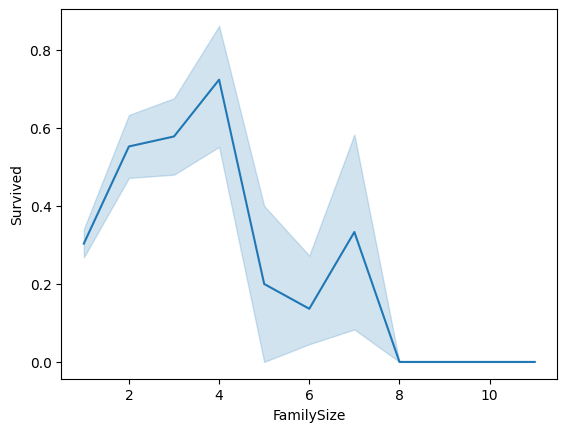

In [21]:
axes = sns.lineplot(data=train,x='FamilySize',y='Survived' )
plt.show()

Important to note that family with 4 members have the most chance to survive

In [22]:
# Create Title column from Name and check the correlations between the title and the sex
for df in combine:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
# Spotting female which have the biggest chance to survive , Replace titles to more common names and group rare titles 
common = ['Master', 'Mr', 'Miss', 'Mrs']
for df in combine:
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    df['Title'] = [x if x in common else 'Rare' for x in df['Title']]

train['Title'].value_counts()


Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [24]:
# Drop Name, SibSp and Parch columns which are now useless data as captured in the family name
train = train.drop(['Name', 'SibSp', 'Parch'], axis = 1)
test = test.drop(['Name', 'SibSp', 'Parch'], axis = 1)
combine = [train, test]


In [25]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Relatives,TravellingAlone,Title
0,1,0,3,male,22.0,7.2500,S,2,1,0.0,Mr
1,2,1,1,female,38.0,71.2833,C,2,1,0.0,Mrs
2,3,1,3,female,26.0,7.9250,S,1,0,1.0,Miss
3,4,1,1,female,35.0,53.1000,S,2,1,0.0,Mrs
4,5,0,3,male,35.0,8.0500,S,1,0,1.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,S,1,0,1.0,Rare
887,888,1,1,female,19.0,30.0000,S,1,0,1.0,Miss
888,889,0,3,female,NaN,23.4500,S,4,3,0.0,Miss
889,890,1,1,male,26.0,30.0000,C,1,0,1.0,Mr


In [26]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize,Relatives,TravellingAlone,Title
0,892,3,male,34.5,7.8292,Q,1,0,1.0,Mr
1,893,3,female,47.0,7.0000,S,2,1,0.0,Mrs
2,894,2,male,62.0,9.6875,Q,1,0,1.0,Mr
3,895,3,male,27.0,8.6625,S,1,0,1.0,Mr
4,896,3,female,22.0,12.2875,S,3,2,0.0,Mrs
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,8.0500,S,1,0,1.0,Mr
414,1306,1,female,39.0,108.9000,C,1,0,1.0,Rare
415,1307,3,male,38.5,7.2500,S,1,0,1.0,Mr
416,1308,3,male,NaN,8.0500,S,1,0,1.0,Mr


# Let's clean the Missing values

In [27]:
#Let's check how many Nans are present in the remaining features values
train.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Sex                  0
Age                177
Fare                 0
Embarked             2
FamilySize           0
Relatives            0
TravellingAlone      0
Title                0
dtype: int64

## Imputation of the age

In [28]:
#Age having a many Nans we will have to think about the value that will replacee the Nans. By default , we would have used the 
#median, but here we may have a better indication of the age using the mean by title.
#Let's find out
round(train.groupby('Title')['Age'].mean(),2)

Title
Master     4.57
Miss      21.85
Mr        32.37
Mrs       35.79
Rare      45.55
Name: Age, dtype: float64

In [29]:
# We therefore will use the median by title to replace the Nans 
for df in combine:
    df.loc[(df['Age'].isnull()) & (df["Title"]=='Master'), 'Age'] = 5
    df.loc[(df['Age'].isnull()) & (df['Title']=='Miss'), 'Age'] = 22
    df.loc[(df['Age'].isnull()) & (df['Title']=='Mr'), 'Age'] = 32
    df.loc[(df['Age'].isnull()) & (df['Title']=='Mrs'), 'Age'] = 36
    df.loc[(df['Age'].isnull()) & (df['Title']=='Rare'), 'Age'] = 46

In [30]:
# We could also ahev used another corroleation with the PC class and the age but I prefer the previous one.
#Impute Age based on Pclass as it is the the most correlated coef with 33.9%
#impute_ages = np.zeros((2,3)) # Create a new array with 2 rows  and 3 columns filled by 0
#for df in combine:
#    for i in range(0, 2):
#        for j in range(0, 3):
#            impute_df = df[(df['Sex'] == i) & \
#                                  (df['Pclass'] == j+1)]['Age'].dropna()
#            impute_ages[i,j] = int(impute_df.median())
#            
#    for i in range(0, 2):
#        for j in range(0, 3):
#            df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1), 'Age'] = impute_ages[i,j]

Check correlation between Embarked & Pclass



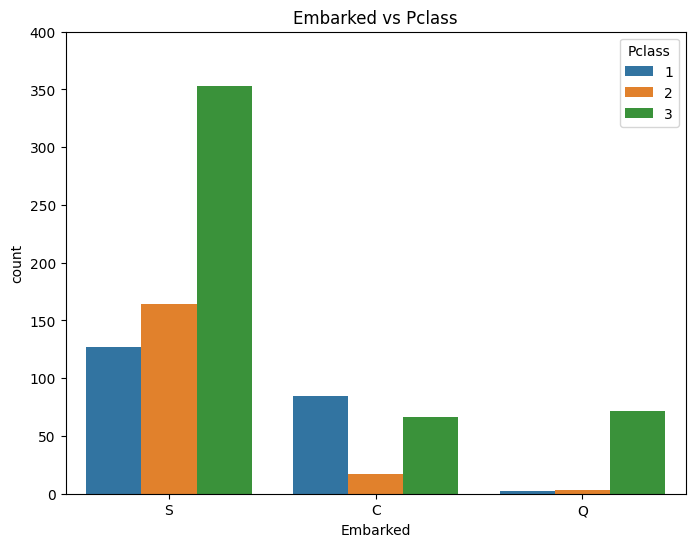

In [31]:
# Check correlation between Embarked & Pclass
fig, ax=plt.subplots(1,figsize=(8,6))
sns.countplot(x='Embarked',hue='Pclass', data=train)
ax.set_ylim(0,400)
plt.title("Embarked vs Pclass")
print('Check correlation between Embarked & Pclass\n')
plt.show()

There is a clear correlation between PClass and Embarked : most of the Pclass 3 with the chepêast fare and the most likehood to die embaked from S where the Pclass 1, with the hihgest chance to survive embarked from C

In [32]:
# We input for all Nan value in the column "Embarked" in relation with its PC Class
impute_embarked= ['', '', '']
for df in combine:
    for i in range(0, 3):
        impute_val = df[df['Pclass'] == i+1]['Embarked'].dropna().mode()[0]
        impute_embarked[i] = impute_val
        
    for i in range(0, 3):
        df.loc[ (df.Embarked.isnull()) & (df.Pclass == i+1), 'Embarked'] = impute_embarked[i]

In [33]:
#let's check the variables used
impute_val, impute_embarked

('S', ['C', 'S', 'S'])

In [34]:
#let's see the repartition and check that all values had been replaced (i.e the sum is 891)
print(train['Embarked'].value_counts())
print (train['Embarked'].value_counts().sum())

S    646
C    168
Q     77
Name: Embarked, dtype: int64
891


In [35]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Relatives,TravellingAlone,Title
0,1,0,3,male,22.0,7.2500,S,2,1,0.0,Mr
1,2,1,1,female,38.0,71.2833,C,2,1,0.0,Mrs
2,3,1,3,female,26.0,7.9250,S,1,0,1.0,Miss
3,4,1,1,female,35.0,53.1000,S,2,1,0.0,Mrs
4,5,0,3,male,35.0,8.0500,S,1,0,1.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,S,1,0,1.0,Rare
887,888,1,1,female,19.0,30.0000,S,1,0,1.0,Miss
888,889,0,3,female,22.0,23.4500,S,4,3,0.0,Miss
889,890,1,1,male,26.0,30.0000,C,1,0,1.0,Mr


### Now that we clean the missing values we can now numericalize the columns 'Embarked', 'Title' and 'Sex'

In [36]:
train = pd.get_dummies(train, prefix=['Sex', 'Embarked', 'Title'])
test = pd.get_dummies(test, prefix=['Sex', 'Embarked', 'Title'])

combine = [train, test]

In [37]:
train

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,Relatives,TravellingAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,22.0,7.2500,2,1,0.0,0,1,0,0,1,0,0,1,0,0
1,2,1,1,38.0,71.2833,2,1,0.0,1,0,1,0,0,0,0,0,1,0
2,3,1,3,26.0,7.9250,1,0,1.0,1,0,0,0,1,0,1,0,0,0
3,4,1,1,35.0,53.1000,2,1,0.0,1,0,0,0,1,0,0,0,1,0
4,5,0,3,35.0,8.0500,1,0,1.0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,13.0000,1,0,1.0,0,1,0,0,1,0,0,0,0,1
887,888,1,1,19.0,30.0000,1,0,1.0,1,0,0,0,1,0,1,0,0,0
888,889,0,3,22.0,23.4500,4,3,0.0,1,0,0,0,1,0,1,0,0,0
889,890,1,1,26.0,30.0000,1,0,1.0,0,1,1,0,0,0,0,1,0,0


In [38]:
# Check if there's any missing values left
print('Number of missing value(s) in every column (Train):')
print(train.isnull().sum())
print('Number of missing value(s) in every column (Test):')
print(test.isnull().sum())

Number of missing value(s) in every column (Train):
PassengerId        0
Survived           0
Pclass             0
Age                0
Fare               0
FamilySize         0
Relatives          0
TravellingAlone    0
Sex_female         0
Sex_male           0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Title_Master       0
Title_Miss         0
Title_Mr           0
Title_Mrs          0
Title_Rare         0
dtype: int64
Number of missing value(s) in every column (Test):
PassengerId        0
Pclass             0
Age                0
Fare               1
FamilySize         0
Relatives          0
TravellingAlone    0
Sex_female         0
Sex_male           0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Title_Master       0
Title_Miss         0
Title_Mr           0
Title_Mrs          0
Title_Rare         0
dtype: int64


In [39]:
# We see that in the test dataset there is a missing value in the column fare.Let's have a closer look
test.loc[(test['Fare'].isnull()==True)]

,PassengerId,Pclass,Age,Fare,FamilySize,Relatives,TravellingAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
152,1044,3,60.5,NaN,1,0,1.0,0,1,0,0,1,0,0,1,0,0


In [40]:
#So the fare missing  is linked to male ,with Mr Title,  travelling alone , in a Class 3 cabin that has embarked
#in S. So all in all with very few chances of a having survived. Let's find the median Fare for a class 3,  Embarked from S


In [41]:
round(train.groupby('Pclass')['Fare'].mean(),2)


Pclass
1    84.15
2    20.66
3    13.68
Name: Fare, dtype: float64

In [42]:
#let's Impute the the value 13.68 to the missing value in Test'Fare'
test.loc[(test['Fare'].isnull()==True),'Fare']=13.68

In [43]:
test.iloc[152]

PassengerId        1044.00
Pclass                3.00
Age                  60.50
Fare                 13.68
FamilySize            1.00
Relatives             0.00
TravellingAlone       1.00
Sex_female            0.00
Sex_male              1.00
Embarked_C            0.00
Embarked_Q            0.00
Embarked_S            1.00
Title_Master          0.00
Title_Miss            0.00
Title_Mr              1.00
Title_Mrs             0.00
Title_Rare            0.00
Name: 152, dtype: float64

In [44]:
#Another way to impute a larger number of nana wouyld have been the method Simple imputer see below

#imputer = SimpleImputer()
#test['Fare'] = list(imputer.fit_transform(test[['Fare']]))
#test['Fare'] = [x[0] for x in test['Fare']]



In [45]:
# Check if there's any missing values left
print('Number of missing value(s) in every column (Train):')
print(train.isnull().sum())
print('Number of missing value(s) in every column (Test):')
print(test.isnull().sum())

Number of missing value(s) in every column (Train):
PassengerId        0
Survived           0
Pclass             0
Age                0
Fare               0
FamilySize         0
Relatives          0
TravellingAlone    0
Sex_female         0
Sex_male           0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Title_Master       0
Title_Miss         0
Title_Mr           0
Title_Mrs          0
Title_Rare         0
dtype: int64
Number of missing value(s) in every column (Test):
PassengerId        0
Pclass             0
Age                0
Fare               0
FamilySize         0
Relatives          0
TravellingAlone    0
Sex_female         0
Sex_male           0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Title_Master       0
Title_Miss         0
Title_Mr           0
Title_Mrs          0
Title_Rare         0
dtype: int64


In [46]:
train

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,Relatives,TravellingAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,22.0,7.2500,2,1,0.0,0,1,0,0,1,0,0,1,0,0
1,2,1,1,38.0,71.2833,2,1,0.0,1,0,1,0,0,0,0,0,1,0
2,3,1,3,26.0,7.9250,1,0,1.0,1,0,0,0,1,0,1,0,0,0
3,4,1,1,35.0,53.1000,2,1,0.0,1,0,0,0,1,0,0,0,1,0
4,5,0,3,35.0,8.0500,1,0,1.0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,13.0000,1,0,1.0,0,1,0,0,1,0,0,0,0,1
887,888,1,1,19.0,30.0000,1,0,1.0,1,0,0,0,1,0,1,0,0,0
888,889,0,3,22.0,23.4500,4,3,0.0,1,0,0,0,1,0,1,0,0,0
889,890,1,1,26.0,30.0000,1,0,1.0,0,1,1,0,0,0,0,1,0,0


In [47]:
test


,PassengerId,Pclass,Age,Fare,FamilySize,Relatives,TravellingAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,34.5,7.8292,1,0,1.0,0,1,0,1,0,0,0,1,0,0
1,893,3,47.0,7.0000,2,1,0.0,1,0,0,0,1,0,0,0,1,0
2,894,2,62.0,9.6875,1,0,1.0,0,1,0,1,0,0,0,1,0,0
3,895,3,27.0,8.6625,1,0,1.0,0,1,0,0,1,0,0,1,0,0
4,896,3,22.0,12.2875,3,2,0.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,32.0,8.0500,1,0,1.0,0,1,0,0,1,0,0,1,0,0
414,1306,1,39.0,108.9000,1,0,1.0,1,0,1,0,0,0,0,0,0,1
415,1307,3,38.5,7.2500,1,0,1.0,0,1,0,0,1,0,0,1,0,0
416,1308,3,32.0,8.0500,1,0,1.0,0,1,0,0,1,0,0,1,0,0


## Define X & y and split the data 

In [48]:
#Let's define X and Y our Input and Target for bothe dataset
y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test=test.copy()

In [49]:
X_train

,PassengerId,Pclass,Age,Fare,FamilySize,Relatives,TravellingAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,3,22.0,7.2500,2,1,0.0,0,1,0,0,1,0,0,1,0,0
1,2,1,38.0,71.2833,2,1,0.0,1,0,1,0,0,0,0,0,1,0
2,3,3,26.0,7.9250,1,0,1.0,1,0,0,0,1,0,1,0,0,0
3,4,1,35.0,53.1000,2,1,0.0,1,0,0,0,1,0,0,0,1,0
4,5,3,35.0,8.0500,1,0,1.0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,13.0000,1,0,1.0,0,1,0,0,1,0,0,0,0,1
887,888,1,19.0,30.0000,1,0,1.0,1,0,0,0,1,0,1,0,0,0
888,889,3,22.0,23.4500,4,3,0.0,1,0,0,0,1,0,1,0,0,0
889,890,1,26.0,30.0000,1,0,1.0,0,1,1,0,0,0,0,1,0,0


In [50]:
X_test

,PassengerId,Pclass,Age,Fare,FamilySize,Relatives,TravellingAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,34.5,7.8292,1,0,1.0,0,1,0,1,0,0,0,1,0,0
1,893,3,47.0,7.0000,2,1,0.0,1,0,0,0,1,0,0,0,1,0
2,894,2,62.0,9.6875,1,0,1.0,0,1,0,1,0,0,0,1,0,0
3,895,3,27.0,8.6625,1,0,1.0,0,1,0,0,1,0,0,1,0,0
4,896,3,22.0,12.2875,3,2,0.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,32.0,8.0500,1,0,1.0,0,1,0,0,1,0,0,1,0,0
414,1306,1,39.0,108.9000,1,0,1.0,1,0,1,0,0,0,0,0,0,1
415,1307,3,38.5,7.2500,1,0,1.0,0,1,0,0,1,0,0,1,0,0
416,1308,3,32.0,8.0500,1,0,1.0,0,1,0,0,1,0,0,1,0,0


## Normalize the data

>>Since the features have varying ranges, we need to normalize the data. There are two ways to go about it; the MinMaxScaler that transforms each feature to a given range and the StandardScaler that standardizes the features by removing the mean and scaling to unit variance. We will use the StandardScaler for our analysis.

In [51]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

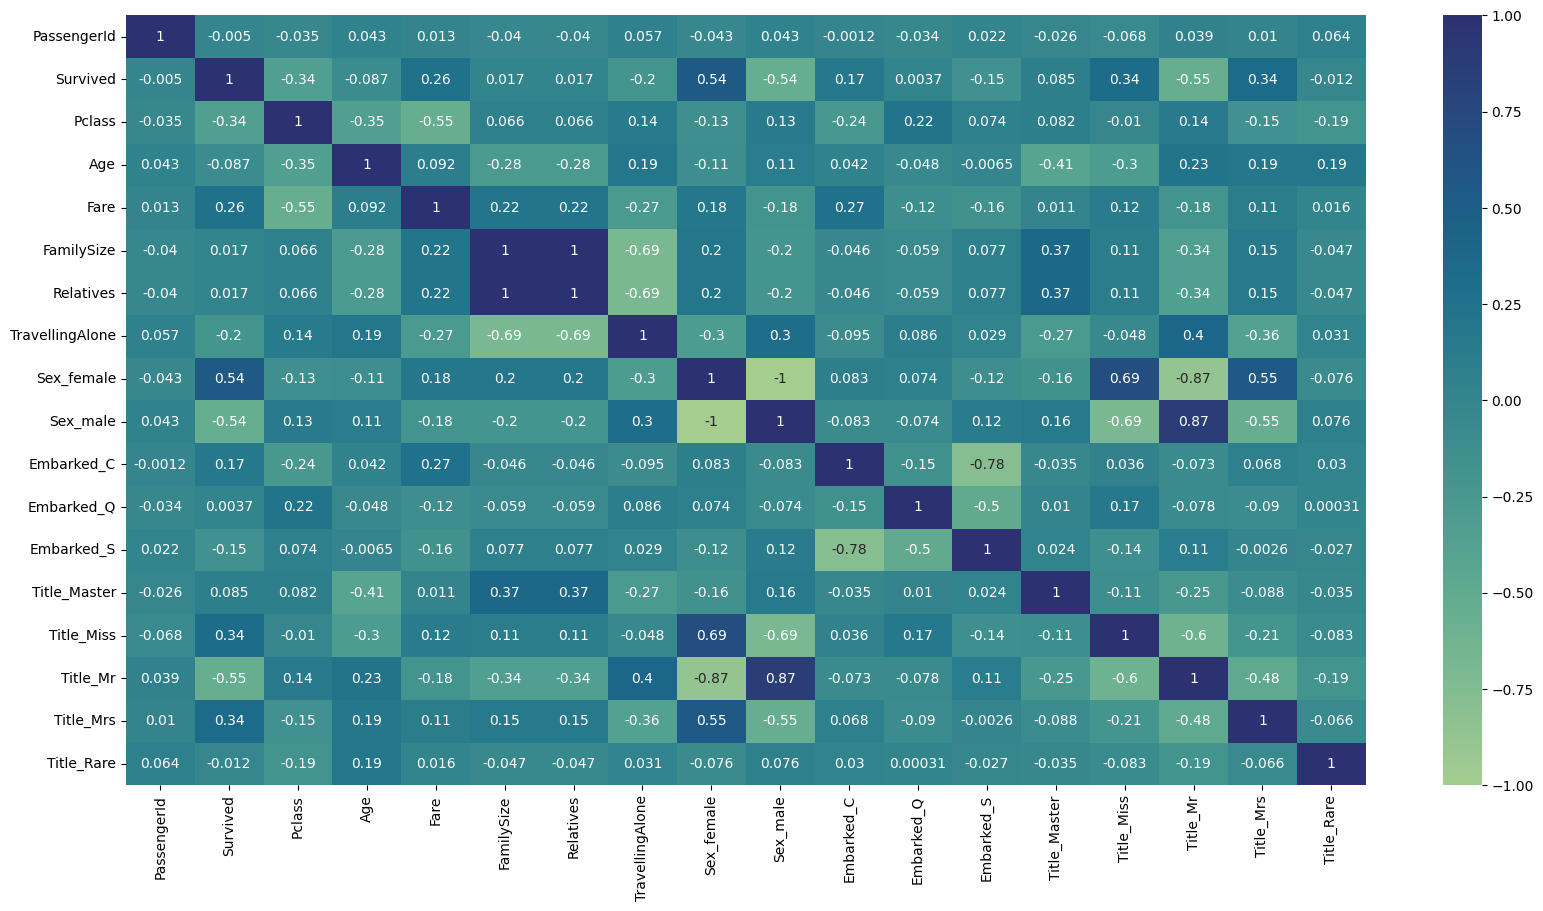

In [52]:
#check the correlation between the numerical variables
fig, ax=plt.subplots(figsize = (20,10))
sns.heatmap(train.corr(), cmap="crest", annot=True, ax=ax)
plt.show()

    If we compare this correlation map with the previous one (when we have not yet numericalized nor engineered features) we can have the  confirmation of the correlation between Survided and Sex (Male or Female) @54%, PC Class@34%, Embarked @32% for all and Fare @ 26%.
    

# Let's get to the modeling 

# Split the Train dataset into x and y try to find the best model

In [53]:
logr = LogisticRegression(max_iter=1000)
logr.fit(X_train_scaled, y_train)
y_pred = logr.predict(X_test_scaled)
logr_acc = round(logr.score(X_train_scaled, y_train) *100, 2)
print('Accuracy: {}'.format(logr_acc))

Accuracy: 83.61


In [54]:
def find_best_model_scaled(X_train_scaled, X_test_scaled, y_train):
    # Logistic Regression
    logr = LogisticRegression(max_iter=1000)
    logr.fit(X_train_scaled, y_train)
    y_pred = logr.predict(X_test_scaled)
    logreg_acc = round(logr.score(X_train_scaled, y_train) *100, 2)
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(random_state = 42)
    decision_tree.fit(X_train_scaled, y_train)
    y_pred = decision_tree.predict(X_test_scaled)
    decision_tree_acc = round(decision_tree.score(X_train_scaled, y_train) * 100, 2)
    
    # Random Forest
    random_forest = RandomForestClassifier(random_state = 42)
    random_forest.fit(X_train_scaled, y_train)
    y_pred = random_forest.predict(X_test_scaled)
    random_forest_acc = round(random_forest.score(X_train_scaled, y_train) * 100, 2)
    
    # XGBoost
    xgb = XGBClassifier(random_state = 42)
    xgb.fit(X_train_scaled, y_train)
    y_pred = xgb.predict(X_test_scaled)
    xgb_acc = round(xgb.score(X_train_scaled, y_train) * 100, 2)
    
    # GBM
    gbm = GradientBoostingClassifier(random_state = 42)
    gbm.fit(X_train_scaled, y_train)
    y_pred = gbm.predict(X_test_scaled)
    gbm_acc = round(gbm.score(X_train_scaled, y_train) * 100, 2)
    
    # LightGBM
    #lgbm = LGBMClassifier(random_state = 42)
    #lgbm.fit(X_train_scaled, y_train)
    #y_pred = lgbm.predict(X_test_scaled)
    #lgbm_acc = round(lgbm.score(X_train_scaled, y_train) * 100, 2)
        
    # Catboost
    catb = CatBoostClassifier(verbose = 0, random_state = 42)
    catb.fit(X_train_scaled, y_train)
    y_pred = catb.predict(X_test_scaled)
    catb_acc = round(catb.score(X_train_scaled, y_train) * 100, 2)
    
    # Histogram-based Gradient Boosting Classification Tree
    hgb = HistGradientBoostingClassifier(random_state = 42)
    hgb.fit(X_train_scaled, y_train)
    y_pred = hgb.predict(X_test_scaled)
    hgb_acc = round(hgb.score(X_train_scaled, y_train) * 100, 2)
    
    model_df = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'GBM', 'Catboost', 'HistBoost'],
                       'Score': [logreg_acc, decision_tree_acc, random_forest_acc, xgb_acc, gbm_acc, catb_acc, hgb_acc]})
    print(model_df.sort_values('Score', ascending = False).reset_index(drop = True))

In [55]:
find_best_model_scaled(X_train_scaled, X_test_scaled, y_train)

                 Model   Score
0        Decision Tree  100.00
1        Random Forest  100.00
2              XGBoost   99.89
3            HistBoost   99.78
4             Catboost   92.82
5                  GBM   91.25
6  Logistic Regression   83.61


## Option 1:  using Random Forest finding the optimal HyperParameters

In [56]:
rfc = RandomForestClassifier(random_state=42, 
                             n_jobs=-1 # Use all cores on your machine
                            )
param_grid = { 
    'n_estimators': [100, 200, 300], # The number of boosting stages to perform
    'max_features': ['sqrt'], # The number of features to consider when looking for the best split
    'max_depth' : [4, 6, 8], # The maximum depth of the individual regression estimators.
    'criterion' :['gini', 'entropy'] #Function to measure the quality of a split
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring = 'accuracy', verbose = 10)
CV_rfc.fit(X_train_scaled, y_train)
print('')
print('Best hyperparameters:',CV_rfc.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100
[CV 1/5; 1/18] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100;, score=0.855 total time=   1.1s
[CV 2/5; 1/18] START criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100
[CV 2/5; 1/18] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100;, score=0.826 total time=   0.1s
[CV 3/5; 1/18] START criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100
[CV 3/5; 1/18] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100;, score=0.826 total time=   0.1s
[CV 4/5; 1/18] START criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100
[CV 4/5; 1/18] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100;, score=0.803 total time=   0.1s
[CV 5/5; 1/18] START criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100
[CV 5/5; 1/18] END criterion=gini, max_de

[CV 1/5; 9/18] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300;, score=0.838 total time=   0.1s
[CV 2/5; 9/18] START criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300
[CV 2/5; 9/18] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300;, score=0.809 total time=   0.1s
[CV 3/5; 9/18] START criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300
[CV 3/5; 9/18] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300;, score=0.837 total time=   0.1s
[CV 4/5; 9/18] START criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300
[CV 4/5; 9/18] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300;, score=0.798 total time=   0.2s
[CV 5/5; 9/18] START criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300
[CV 5/5; 9/18] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=300;, score=0.843 total time=   0.1s
[CV 1/5; 10/18] START criterion=entropy, max_depth=4, max_features=sqrt

[CV 2/5; 17/18] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200;, score=0.820 total time=   0.1s
[CV 3/5; 17/18] START criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200
[CV 3/5; 17/18] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200;, score=0.831 total time=   0.1s
[CV 4/5; 17/18] START criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200
[CV 4/5; 17/18] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200;, score=0.798 total time=   0.1s
[CV 5/5; 17/18] START criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200
[CV 5/5; 17/18] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200;, score=0.831 total time=   0.1s
[CV 1/5; 18/18] START criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=300
[CV 1/5; 18/18] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=300;, score=0.832 total time=   0.2s
[CV 2/5; 18/18] START criterion=ent

Best hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}

In [57]:
model_op=RandomForestClassifier(
    n_estimators = 100, 
    class_weight = None, # classifier specific
    criterion = 'gini',  # classifier specific
    max_depth = 4, 
    max_features='sqrt',
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0,  
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    ccp_alpha = 0.0, 
    random_state = 42, 
    bootstrap = True, 
    oob_score = True, 
    max_samples = 0.75,
    warm_start = False, 
    n_jobs = -1, 
    verbose = 0, 
)
%time model_op.fit(X_train_scaled, y_train)


y_pred = model_op.predict(X_train_scaled)
print(model_op.score(X_train_scaled,y_train))
acc_rmodel_op = round(model_op.score(X_train_scaled, y_train) * 100, 2)
print(acc_rmodel_op)
print(model_op.oob_score_)    

CPU times: user 117 ms, sys: 51 ms, total: 168 ms
Wall time: 111 ms
0.8372615039281706
83.73
0.8338945005611672


In [58]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       549
           1       0.82      0.74      0.78       342

    accuracy                           0.84       891
   macro avg       0.83      0.82      0.82       891
weighted avg       0.84      0.84      0.84       891



## Option 2: using Decision Tree finding the optimal HyperParameters 

In [59]:
dt_param_grid = {'max_depth': np.arange(1, 10)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                        dt_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
dt_grid.fit(X_train_scaled, y_train)
print('DecisionTree Best parameters', dt_grid.best_params_)
dt_model = dt_grid.best_estimator_
print('DecisionTree best score = ',dt_grid.best_score_ )

DecisionTree Best parameters {'max_depth': 3}
DecisionTree best score =  0.8484365327884064


Train Accuracy: 0.8305274971941639
Train F1-Score: 0.7802037845705968


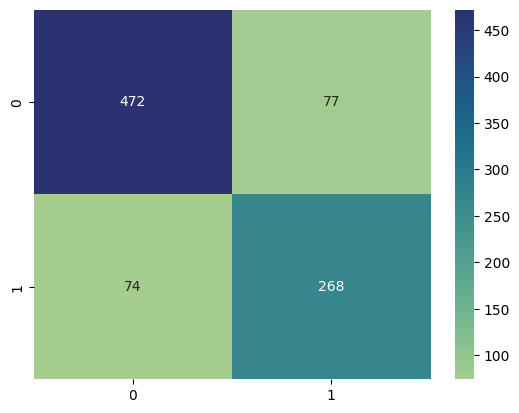

In [60]:
y_pred1 = dt_grid.predict(X_train_scaled)
print(f"Train Accuracy: {accuracy_score(y_train, y_pred1)}")
print(f"Train F1-Score: {f1_score(y_train, y_pred1)}")
sns.heatmap(confusion_matrix(y_train, y_pred1), fmt='.3g', annot=True, cmap='crest')
plt.show()

In [61]:
print(classification_report(y_train, y_pred1
                           ))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       549
           1       0.78      0.78      0.78       342

    accuracy                           0.83       891
   macro avg       0.82      0.82      0.82       891
weighted avg       0.83      0.83      0.83       891



## Option 3:  using XG Boost

In [66]:
# Instantiate our model
xg = XGBClassifier(learning_rate=0.02, n_estimators=750,
                   max_depth= 3, min_child_weight= 1, 
                   colsample_bytree= 0.6, gamma= 0.0, 
                   reg_alpha= 0.001, subsample= 0.8
                  )
xg.fit(X_train_scaled, y_train)

xg_predictions = xg.predict(X_test_scaled)
print (round(xg.score(X_train_scaled, y_train) * 100, 2))

90.91


In [67]:
y_pred2 = xg.predict(X_train_scaled)
print(f"Train Accuracy: {accuracy_score(y_train, y_pred2)}")
print(f"Train F1-Score: {f1_score(y_train, y_pred2)}")


Train Accuracy: 0.9090909090909091
Train F1-Score: 0.8755760368663594


In [68]:
print(classification_report(y_train, y_pred2
                           ))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       549
           1       0.92      0.83      0.88       342

    accuracy                           0.91       891
   macro avg       0.91      0.89      0.90       891
weighted avg       0.91      0.91      0.91       891



### with 91% XG Boost has have a better accuracy than Random Forest and Decision Tree with 84% and 83%

## Let's prepare the submission

In [69]:
test

,PassengerId,Pclass,Age,Fare,FamilySize,Relatives,TravellingAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,34.5,7.8292,1,0,1.0,0,1,0,1,0,0,0,1,0,0
1,893,3,47.0,7.0000,2,1,0.0,1,0,0,0,1,0,0,0,1,0
2,894,2,62.0,9.6875,1,0,1.0,0,1,0,1,0,0,0,1,0,0
3,895,3,27.0,8.6625,1,0,1.0,0,1,0,0,1,0,0,1,0,0
4,896,3,22.0,12.2875,3,2,0.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,32.0,8.0500,1,0,1.0,0,1,0,0,1,0,0,1,0,0
414,1306,1,39.0,108.9000,1,0,1.0,1,0,1,0,0,0,0,0,0,1
415,1307,3,38.5,7.2500,1,0,1.0,0,1,0,0,1,0,0,1,0,0
416,1308,3,32.0,8.0500,1,0,1.0,0,1,0,0,1,0,0,1,0,0


In [70]:

predictions = xg.predict(X_test_scaled)

output = pd.DataFrame({'PassengerId': test.PassengerId,
                      'Survived': predictions})

output.to_csv('titanic-submission_6.csv', index= False)

